#  Selected molecular descriptors from the Dragon chemoinformatics application were used to predict bioconcentration factors for 779 chemicals in order to evaluate QSAR (Quantitative Structure Activity Relationship). This dataset was obtained from the UCI machine learning repository. The dataset consists of 779 observations of 10 attributes.
# Below is a brief description of each feature and the response variable logBCF in our dataset
# 1.nHM- number of heavy atoms (integer)
# 2.piPC09- molecular multiple path count (numeric)
# 3.PCD- difference between multiple path count and path count (numeric)
# 4.X2Av- average valence connectivity (numeric)
# 5.MLOGP- Moriguchi octanol-water partition coefficient (numeric)
# 6.ON1V- overall modified Zagreb index by valence vertex degrees (numeric)
# 7.N.072- Frequency of RCO-N< / >N-X=X fragments (integer)
# 8.B02[C-N]- Presence/Absence of C-N atom pairs (binary)
# 9.F04[C-O]- Frequency of C-O atom pairs (integer)
# 10.logBCF- Bioconcentration Factor in log units (numeric)



***Note : Write inference whenever it is required.***

1. Import required Library

In [ ]:
# Import necessary libraries for unsupervised machine learning classification
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


2. Read the dataset (tab, csv, xls, txt, inbuilt dataset) and display no of rows and columns in dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/My Drive/second sem ct3 USL/data_project.csv", encoding='latin1')

# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 779
Number of columns: 14


3. Display top five rows.

In [ ]:
df.head()

,ÿCAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.0,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.0,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.0,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.0,0.52,0.25,2.65,1.31,0,0,0,1,2.24


4.(a) Drop unnecessary columns(ÿCAS,SMILES,Set,Class).
4.(b) Drop the Target variable

In [ ]:
# Drop unnecessary columns
df.drop(['ÿCAS', 'SMILES', 'Set', 'Class'], axis=1, inplace=True)

# Drop the target variable
df.drop('logBCF', axis=1, inplace=True)

# Display the updated DataFrame
df.head()


,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5
1,0,0.0,1.47,0.14,1.70,0.88,0,1,5
2,0,0.0,1.20,0.25,4.14,2.06,0,0,0
3,0,0.0,1.69,0.13,1.89,0.79,0,1,8
4,0,0.0,0.52,0.25,2.65,1.31,0,0,0


5.(a) Describe the dataset.

In [ ]:
df.describe()


,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000


5.(b)  Do proper EDA over dataset (5 Marks)

In [ ]:
import matplotlib.pyplot as plt

# Check for missing values
df.isnull().sum()




nHM         0
piPC09      0
PCD         0
X2Av        0
MLOGP       0
ON1V        0
N-072       0
B02[C-N]    0
F04[C-O]    0
dtype: int64

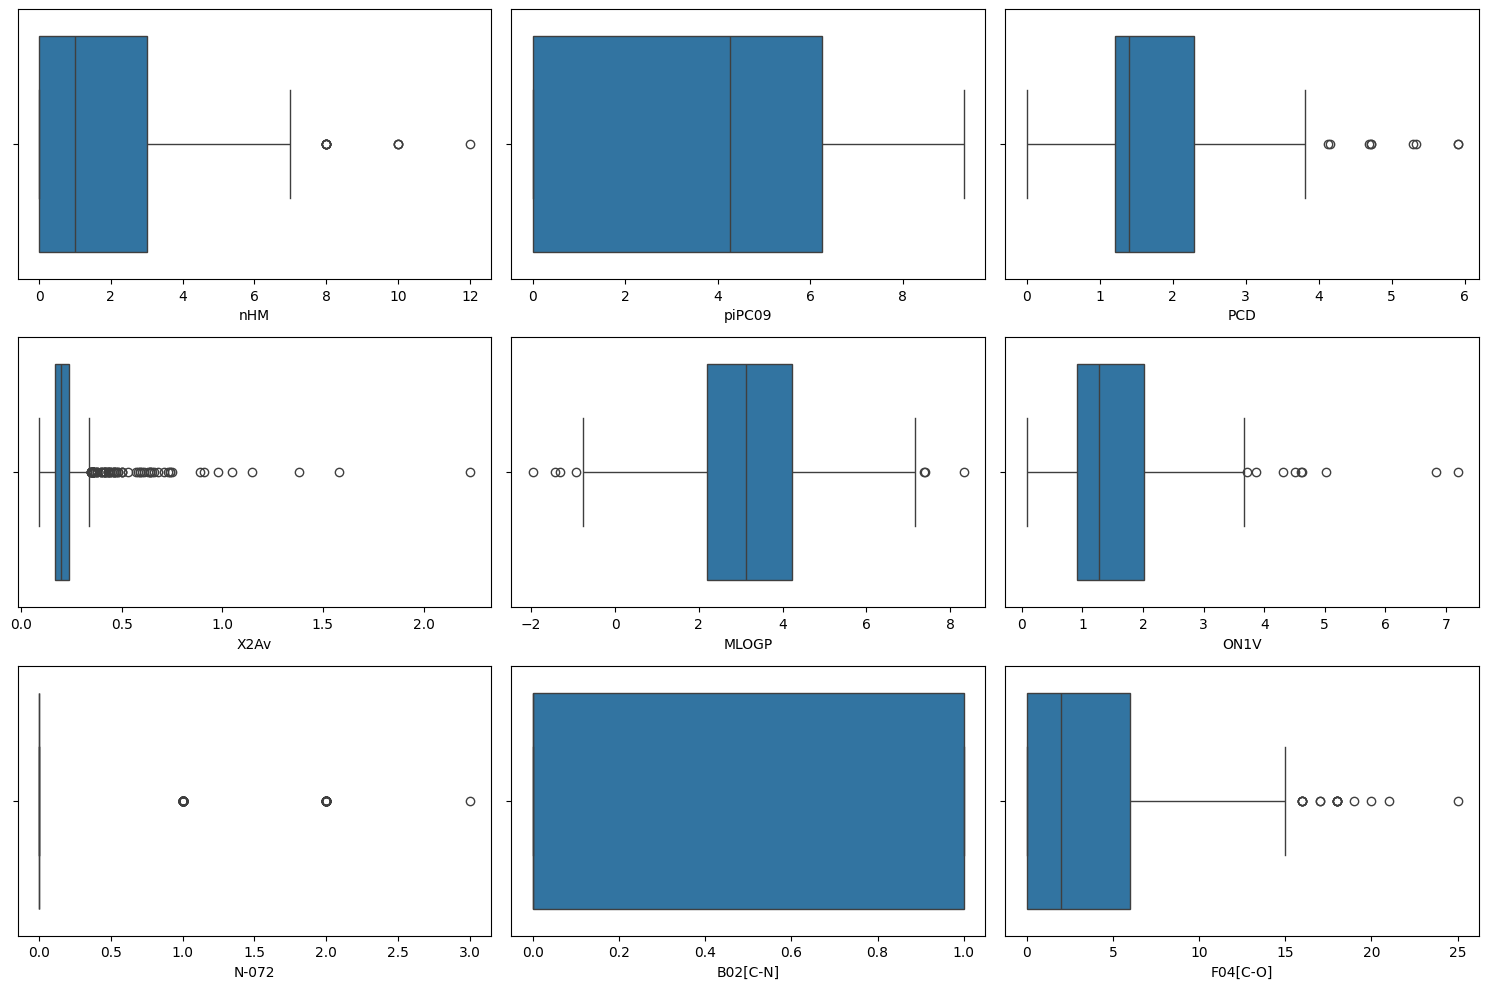

In [ ]:

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col_name in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[col_name], ax=axes[row, col])  # Use col_name to access column by name

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

#### Data have outliers ,so some algorithms like kmeans ,GMM not suitable. DBSCAN ,fuzzy are more robust to outliers however we check for all

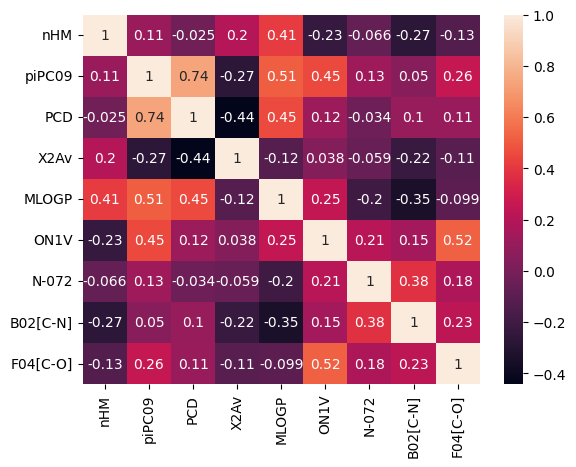

In [ ]:
# Visualize the correlations using a heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()



Redundant Information: Highly correlated features provide redundant information to the clustering algorithm. Redundant features can skew the results of clustering algorithms, leading to biased cluster assignments.


Dimensionality Reduction: Identifying and removing highly correlated features can aid in dimensionality reduction, which can be beneficial for improving the efficiency and interpretability of clustering algorithms, especially in high-dimensional datasets.
Interpretability: Understanding the relationships between features can provide insights into the underlying structure of the data and help interpret the resulting clusters. Features with high correlation might represent similar aspects of the data, which can be informative when interpreting the characteristics of each cluster.

6. Apply scaling techinque  and transform the data.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a Pandas DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)


In [ ]:
df_scaled.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O]
0,-0.88422,-1.162903,-0.063482,-0.649235,-1.161204,-0.947350,-0.371073,1.166450,0.319505
1,-0.88422,-1.162903,-0.084357,-0.649235,-0.941724,-0.755553,-0.371073,1.166450,0.319505
2,-0.88422,-1.162903,-0.366167,0.087918,0.588366,0.658947,-0.371073,-0.857302,-0.809781
3,-0.88422,-1.162903,0.145266,-0.716249,-0.822578,-0.863439,-0.371073,1.166450,0.997077
4,-0.88422,-1.162903,-1.075911,0.087918,-0.345992,-0.240100,-0.371073,-0.857302,-0.809781


7(a). Apply KMeans Clustering from k = 1 to 10 and display WSS values. (1 mark)
7(b). Display Elbow curve for above k values. (2 marks)
7(c). Apply KMeans Clustering for specific k value (2 marks)
7(d). Display predicted labels with x as piPC09 and y as PCD with hue as kmeans predicetd label. (1 mark)
7(e). Write proper inference

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)


[7011.000000000002, 5502.8165547421, 4582.577837656349, 4046.5916675629533, 3601.9856329538584, 3207.9339787126805, 2865.746891939892, 2702.388263456258, 2542.456024399484, 2404.7360636438993]


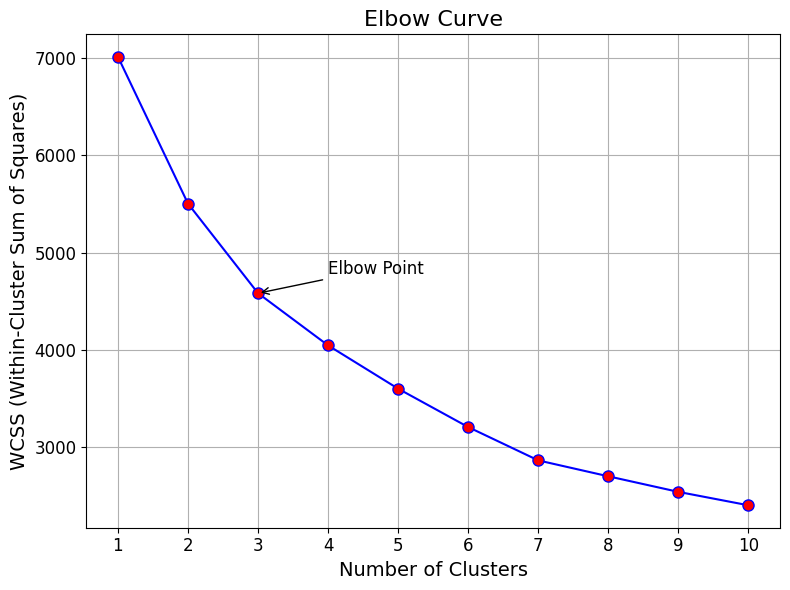

In [ ]:
# Your data for the elbow curve (range of clusters and corresponding WCSS)
clusters = range(1, 11)


# Plotting the elbow curve
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
plt.plot(clusters, wcss, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)  # Customize marker style, color, and size
plt.title('Elbow Curve', fontsize=16)  # Increase title font size
plt.xlabel('Number of Clusters', fontsize=14)  # Increase x-axis label font size
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)  # Increase y-axis label font size
plt.xticks(clusters, fontsize=12)  # Increase x-axis tick label font size
plt.yticks(fontsize=12)  # Increase y-axis tick label font size

# Annotate the elbow point
plt.annotate('Elbow Point', xy=(3, wcss[2]), xytext=(4, wcss[2] + 200),  # Customize annotation position
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  # Customize arrow style and font size

plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [ ]:

# Apply KMeans Clustering for k = 3
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmeans.fit(df_scaled)

# Display predicted labels
print(kmeans.labels_)


[1 1 1 1 1 1 1 1 0 2 2 1 0 2 0 0 2 1 1 1 1 0 1 1 0 0 2 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 2 1 2 2 2 0 0 1 2 2 1 0 2 1 2 2 2 0 1 2 1 2 2 2 1 2 1 2 0 0 0 2 2 2 0
 2 1 1 1 2 1 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 1 2 0 2 1 1 1 2 2 1 1 1 2 0 2
 2 0 1 2 1 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 1 1 2 2 1 2 2 1 2 1 2 0 1 1 1
 2 2 1 1 1 2 1 2 2 2 1 1 2 0 0 2 2 1 1 1 0 0 0 1 1 1 1 1 0 1 2 2 0 2 2 1 1
 2 1 0 1 0 0 2 0 2 1 2 2 1 2 1 1 2 2 0 0 1 2 1 0 0 0 0 0 0 0 0 2 0 1 0 0 0
 2 0 0 1 0 2 0 2 2 0 2 1 2 2 2 1 2 0 2 0 1 1 2 1 1 2 2 2 2 0 1 1 1 1 2 2 2
 2 2 2 2 1 2 2 2 2 1 1 2 0 2 2 1 2 2 1 1 1 2 0 1 1 0 0 2 0 2 1 1 0 0 0 0 0
 0 0 1 2 2 2 2 0 0 2 2 0 2 1 1 1 2 0 0 2 2 0 1 0 0 0 0 0 2 2 0 0 0 2 0 2 1
 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 1 2 2 0 0 0 0 2 0 2 2 2 1 0 2
 2 2 1 1 2 0 1 0 1 1 1 1 1 2 0 2 2 1 1 1 2 0 2 0 0 1 1 0 0 1 1 2 2 1 1 0 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 0 1 2 1 0 2 2 2 0 0 0 2 0 1 0 0 0 0 0 1 0 0
 1 0 2 1 0 1 1 1 2 0 0 1 

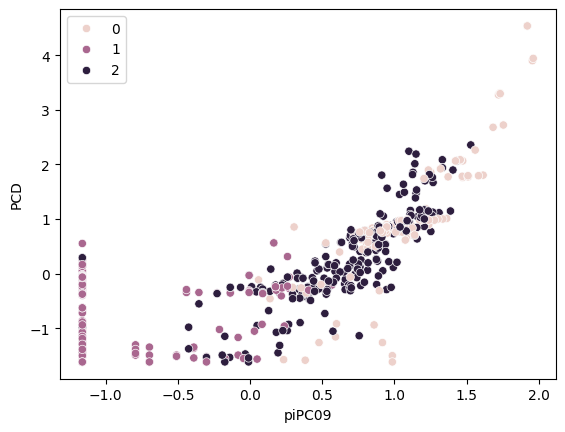

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x="piPC09", y="PCD", hue=kmeans.labels_, data=df_scaled)
plt.show()


8(a). Apply Agglomerative Clustering with different no. of cluster
8(b). Choose appropriate evaluation metric to find best no. of clusters
8(c). Display predicted labels with x as piPC09 and y as PCD with hue as agglometrative predicetd label.
8(d). Write proper inference

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Agglomerative Clustering model
agglom = AgglomerativeClustering(n_clusters= 8)

# Fit the model to the scaled data
agglom.fit(df_scaled)

# Get the cluster labels for each data point
labels_agglom = agglom.labels_

# Print the cluster labels
print(labels_agglom)


[4 4 0 4 0 0 4 0 6 2 2 6 1 6 1 1 6 4 4 4 0 1 4 4 7 3 3 0 0 0 4 6 0 2 0 0 0
 0 0 4 0 5 5 0 4 0 6 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 6 0 4 4 0 6
 0 4 6 0 2 6 0 0 7 0 3 0 0 7 2 4 6 3 6 0 0 6 0 4 2 2 4 6 4 3 1 1 1 6 6 6 1
 2 4 0 0 6 4 2 4 6 4 4 0 4 4 6 6 3 6 6 6 0 0 0 3 6 6 0 0 0 3 2 0 0 0 2 1 3
 6 1 5 3 0 6 1 2 0 1 1 0 2 2 2 6 6 6 2 1 6 2 0 0 2 2 2 3 6 0 2 0 6 7 0 0 5
 6 6 0 6 0 3 0 2 2 2 4 0 6 7 7 2 2 0 0 0 0 1 7 0 0 4 4 4 0 0 2 3 1 2 2 0 4
 2 0 0 0 1 7 6 0 6 4 6 6 4 6 6 4 2 2 1 7 2 2 4 1 1 1 1 7 1 1 1 6 0 2 7 6 0
 2 1 1 0 1 6 7 6 6 1 3 2 2 2 3 2 2 7 2 7 2 0 6 5 5 3 2 6 6 1 1 0 4 4 0 3 0
 6 0 6 2 6 2 2 2 2 0 6 2 7 2 6 0 3 6 5 5 5 3 0 0 2 1 7 2 7 2 4 0 7 7 7 7 1
 7 7 0 2 2 6 3 7 7 6 2 1 6 0 0 0 6 1 1 2 2 0 4 1 1 7 7 7 2 6 7 7 7 6 7 2 0
 0 2 7 7 0 2 7 7 7 7 7 7 7 7 7 7 1 6 2 7 7 6 0 2 6 7 7 7 7 2 7 6 6 6 4 1 6
 6 6 0 1 6 7 0 1 0 4 4 4 0 3 7 2 6 0 4 0 6 1 6 1 7 0 0 7 7 4 0 2 6 4 0 1 0
 0 0 0 0 4 0 3 6 6 0 0 4 4 4 5 7 6 2 0 7 5 6 6 1 7 7 3 0 0 1 7 7 7 7 0 7 1
 0 7 2 2 1 6 0 0 2 1 7 0 

In [ ]:
# Define a range of cluster numbers
cluster_range = range(2, 11)  # From 2 to 10 clusters

# Initialize an empty list to store silhouette scores for each number of clusters
silhouette_scores = []

# Perform Agglomerative Clustering with different numbers of clusters
for n_clusters in cluster_range:
    # Initialize the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward')

    # Fit the model to the data and obtain cluster labels
    cluster_labels = model.fit_predict(df_scaled)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Print the silhouette scores for each number of clusters
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.20720393010666405
Number of clusters: 3, Silhouette Score: 0.2417973614981374
Number of clusters: 4, Silhouette Score: 0.2307321757509227
Number of clusters: 5, Silhouette Score: 0.2045087238921572
Number of clusters: 6, Silhouette Score: 0.22019620949166743
Number of clusters: 7, Silhouette Score: 0.23291679574357632
Number of clusters: 8, Silhouette Score: 0.23663500361045137
Number of clusters: 9, Silhouette Score: 0.2455729991004712
Number of clusters: 10, Silhouette Score: 0.2459323495143644


In [ ]:
# Initialize the Agglomerative Clustering model
agglom = AgglomerativeClustering(n_clusters= 3)

# Fit the model to the scaled data
agglom.fit(df_scaled)

# Get the cluster labels for each data point
labels_agglom = agglom.labels_

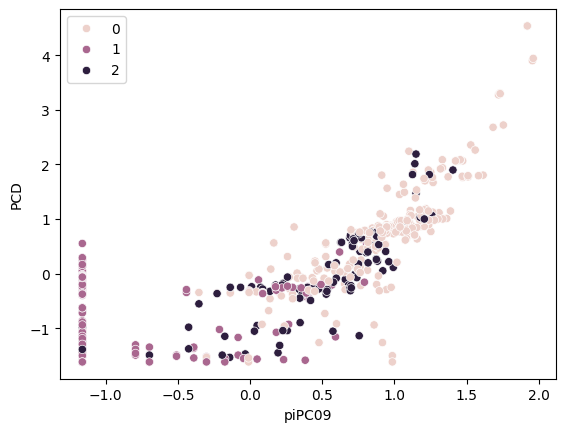

In [ ]:
# Display predicted labels with x as piPC09 and y as PCD with hue as agglometrative predicetd label
sns.scatterplot(x="piPC09", y="PCD", hue=labels_agglom, data=df_scaled)
plt.show()


9(a). Apply DBSCAN Technique
9(b). Choose proper parameter for eps,min
9(c). Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label.
9(d). Write proper inference

[ 0  0  1  0  1  1  0  1  0  2  3  0  1  0  1  1  0  0  0  0  1  1  0  0
  1  1  1  1  1  1  0  0  1  3  1  1  1  1  1  0  1 -1  1  1  0  1  0  1
  1  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  0  1  0  0
  1  0  1  0  0  1  2  0 -1  1  1  1  1  1  1  1  2  0  0 -1  0  1  1  0
  1  0  3  3  0  0  0  1  1  1  1  0  0  0  1 -1  0  1  1  0  0  2  0  0
  0  0  1  0  0  0  0  1  0  0  0  1  1  1  1  0  0  1  1 -1  1  3  1  1
  1  2  1  1  0  1  1  1  1  0  1  3  1  1  1  1  3  3  3  0  0  0  3  1
  0  3 -1 -1  2  2 -1  1  0  1  3  1  0 -1  1  1 -1  0  0  1  0  1  1  1
  3  3 -1  0  1  0  1  1  3  2  1  1  1 -1  1  1  1  1  0  0  0  1  1  2
  1  1  2  3  1  0  2  1  1  1  1  1  0  1  0  0  0  0  0  0  0  0  3  3
  1  1  3 -1  0  1  1  1  1  1  1  1  1  0  1  3  1  0  1  2  1  1  1  1
  0  1  0  0 -1  1  3  3  3  1  2  3 -1 -1  1  3  1  0  1  1  1  3  0  0
  1  1  1  0  0  1  1  1  0  1  0 -1  0  3  3 -1 -1  1  0  3  1  3  0  1
  1  0  1  1  1  1  1  1 -1  1  1  2  1  3  0  1  1

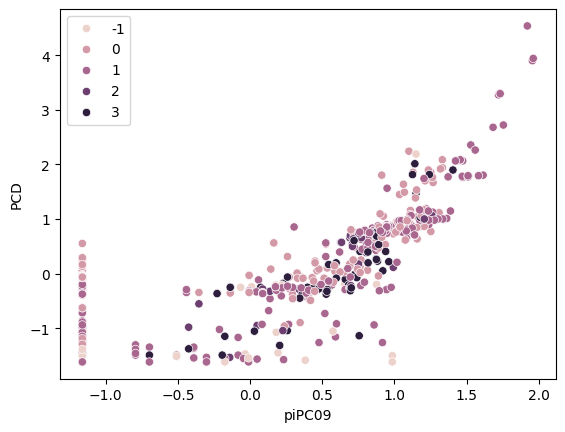

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model with desired parameters
dbscan = DBSCAN(eps=2, min_samples=9)

# Fit the model to the scaled data
labels_dbscan = dbscan.fit_predict(df_scaled)

# Print the cluster labels
print(labels_dbscan)

# Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label
sns.scatterplot(x="piPC09", y="PCD", hue=labels_dbscan, data=df_scaled)
plt.show()


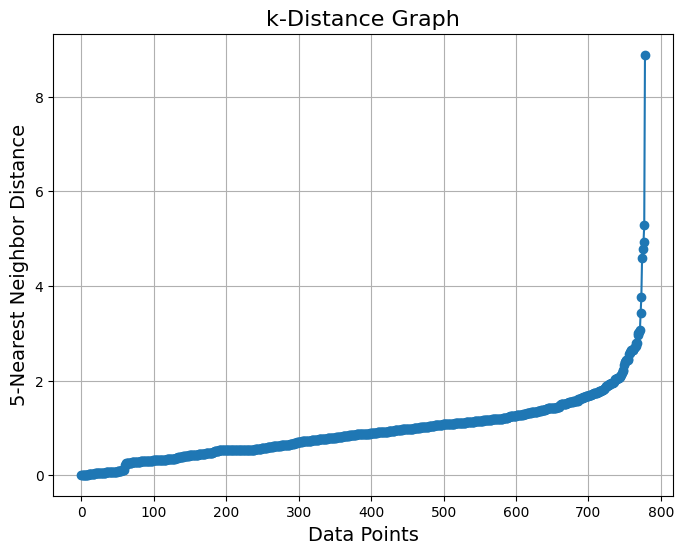

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Assuming you have your data stored in a numpy array 'X'
X = df_scaled.copy(deep=True)  # Your data

# Fit a k-nearest neighbors model to compute distances
n_neighbors = 5  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
distances, _ = nbrs.kneighbors(X)

# Sort the distances of each point to its k-nearest neighbors
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(X)), k_distances, marker='o', linestyle='-')
plt.title('k-Distance Graph', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel(f'{n_neighbors}-Nearest Neighbor Distance', fontsize=14)
plt.grid(True)
plt.show()


10(a). Apply GMM  Soft clustering and display the clustered labels.
10(b). Also evaluate the cluster using proper metrics

In [ ]:
# prompt: Apply GMM Soft clustering and display the clustered labels

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
y_pred = gmm.predict(df_scaled)
print(y_pred)


[2 2 2 2 2 2 2 0 0 1 1 0 0 0 0 0 0 2 2 2 2 0 2 2 0 0 0 2 2 2 2 0 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 0 0 1 0 0 0 0 2 0 0 2 0 1 2 0 0 0 2 2 0 2 2 1 1 2 0 2 0 0 0 0 0 0 0 0
 1 2 2 2 0 2 1 2 0 2 2 0 2 2 0 0 0 0 0 0 2 2 2 0 0 0 2 2 0 0 1 2 2 2 1 0 0
 0 0 2 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 2 2 1 1 1 0 0 2 1 2 0 0 2 0 2
 0 0 2 0 0 0 2 1 1 1 2 2 0 0 0 1 1 2 2 2 0 0 0 0 0 2 2 2 0 2 1 0 0 1 1 0 2
 1 2 0 2 0 0 0 0 0 2 0 0 2 0 0 2 1 1 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 2 0 2 2 0 1 0 0 0 0 2 2 2 0 0 0
 0 0 0 1 0 1 1 1 1 2 0 1 0 1 0 0 0 0 2 2 2 0 0 2 1 0 0 1 0 1 2 2 0 0 0 0 0
 0 0 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 2 0 0 0 2 0 2 2 2 2 0 0 0 1 0 2 2 2 0 0 0 0 0 2 2 0 0 2 2 1 0 2 2 0 2
 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 0 0 1 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0
 2 0 1 1 0 0 2 2 1 0 0 2 

In [ ]:
# Initialize the GMM model
n_components = 3  # Number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the GMM model to the data
gmm.fit(X)

# Predict cluster assignments for each data point
cluster_labels = gmm.predict(X)

# Compute the soft cluster assignments (membership probabilities)
cluster_probs = gmm.predict_proba(X)

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")



Cluster Labels:
[0 0 0 0 0 0 0 2 2 1 1 2 2 2 2 2 2 0 0 0 0 2 0 0 2 2 2 0 0 0 0 2 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2
 0 0 2 2 1 2 2 2 2 0 2 2 0 2 1 0 2 2 2 0 0 2 0 0 1 1 0 2 0 2 2 2 2 2 2 2 2
 1 0 0 0 2 0 1 0 2 0 0 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 0 0 2 2 1 0 0 0 1 2 2
 2 2 0 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 1 2 2 1 0 0 1 1 1 2 2 0 1 0 2 2 0 2 0
 2 2 0 2 2 2 0 1 1 1 0 0 2 2 2 1 1 0 0 0 2 2 2 2 2 0 0 0 2 0 1 2 2 1 1 2 0
 1 0 2 0 2 2 2 2 2 0 2 2 0 2 2 0 1 1 2 2 1 1 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 1 0 2 0 0 2 1 2 2 2 2 0 0 0 2 2 2
 2 2 2 1 2 1 1 1 1 0 2 1 2 1 2 2 2 2 0 0 0 2 2 0 1 2 2 1 2 1 0 0 2 2 2 2 2
 2 2 0 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 0 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 0 2 2 2 0 2 0 0 0 0 2 2 2 1 2 0 0 0 2 2 2 2 2 0 0 2 2 0 0 1 2 0 0 2 0
 0 0 0 0 0 0 2 2 2 0 2 0 0 0 0 2 2 1 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2
 0 2 1 1 

11(a). Apply FCM  Soft clustering and display the clustered labels.
11(b). Also evaluate the cluster using proper metrics

In [ ]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=c89e82078457efa059cbde4d804c85ce51de0efd5325dfa98f22401bfc272ee8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz

# Set the number of clusters
n_clusters = 3

# Set the fuzziness parameter (m) - typically a value between 1.5 and 2
m = 2

# Apply FCM soft clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X.T, n_clusters, m, error=0.005, maxiter=1000)

# Get the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Cluster Labels:
[2 2 2 2 2 2 2 2 1 0 0 0 1 0 1 1 0 2 2 2 2 1 2 2 1 1 0 2 2 2 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 0 2 0 0 0 1 1 2 0 0 2 1 0 2 0 0 0 1 2 0 2 0 0 0 2 0 2 0 1 1 1 0 0 0 1
 0 2 2 2 0 0 0 2 0 2 2 2 2 2 0 0 1 2 0 0 2 2 2 0 1 0 2 2 1 0 0 2 2 2 0 1 0
 0 1 2 1 2 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 0 2 0 1 2 2 2
 0 0 2 2 2 1 2 0 0 0 2 2 0 1 1 0 0 2 2 2 1 1 1 2 2 2 2 2 1 2 0 0 1 0 0 2 2
 0 2 1 2 1 1 1 1 0 2 0 0 2 0 0 2 0 0 1 1 0 0 2 1 1 1 1 1 1 1 1 0 1 2 1 0 1
 0 1 1 2 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 2 0 2 2 1 0 0 0 1 1 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 1 0 0 2 0 0 2 2 2 0 1 2 2 1 1 0 1 0 2 2 1 1 1 1 1
 1 1 2 0 0 0 0 1 1 0 0 1 0 2 2 2 0 1 1 0 0 1 2 1 1 1 1 1 0 0 1 1 1 0 1 0 2
 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 2 0 0 1 1 1 1 0 1 0 0 0 2 1 0
 0 0 2 1 0 1 2 1 2 2 2 2 2 0 1 0 0 2 2 2 0 1 0 1 1 2 2 1 1 2 2 0 0 0 2 1 2
 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 1 0 0 2 1 0 0 0 1 1 1 0 1 2 1 1 1 1 1 2 1 1
 2 1 0 2 

12(a). Apply PCA and display explained variance.
12(b). Display Cumulative variance.
12(c). Apply proper technique to find optimal n_components for pca
12(d). Decompose the dataset with by retaining 95% of information using PCA

Explained Variance:
PC1: 0.2862
PC2: 0.2319
PC3: 0.1455
PC4: 0.1097
PC5: 0.0749
PC6: 0.0626
PC7: 0.0519
PC8: 0.0249
PC9: 0.0125
Cumulative Variance:
PC1: 0.2862
PC2: 0.5180
PC3: 0.6635
PC4: 0.7733
PC5: 0.8481
PC6: 0.9107
PC7: 0.9626
PC8: 0.9875
PC9: 1.0000


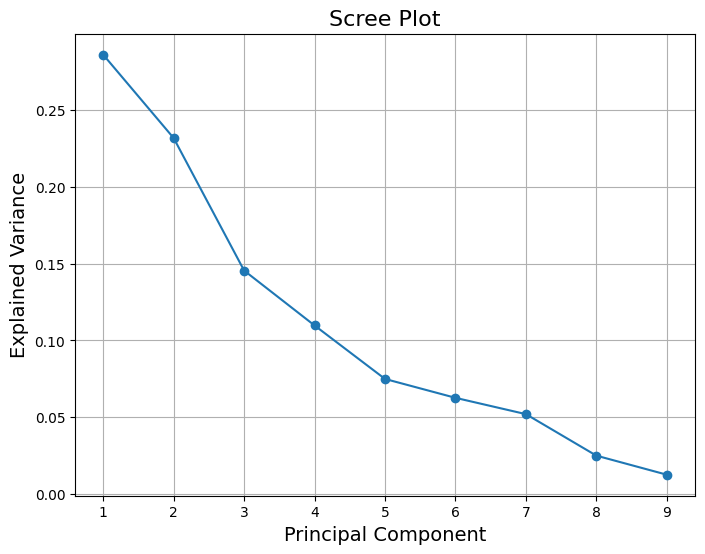

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(df_scaled)

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Display cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Find optimal number of components using scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.grid(True)
plt.show()




In [ ]:
# Decompose the dataset with by retaining 95% of information
pca = PCA(n_components=0.95)
pca.fit(df_scaled)

# Transformed data
transformed_data = pca.transform(df_scaled)

In [ ]:
pca_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])


In [ ]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.016009,-1.487967,-1.442479,-0.457584,0.726557,0.405753,-0.122824
1,0.881730,-1.425552,-1.307014,-0.496336,0.648610,0.361328,-0.301334
2,0.768580,0.393879,0.200132,-1.114406,-1.063223,-0.693351,-0.695911
3,0.557953,-1.538621,-1.221316,-0.604389,1.128133,0.321561,-0.095357
4,1.766564,0.025886,-0.155269,-0.922593,-0.656319,-0.728863,-0.213843


13(a) Cluster the decomposed pca data into optimal cluster with most suitable hard & soft clustering method
13(b) Write the inferenece for the above

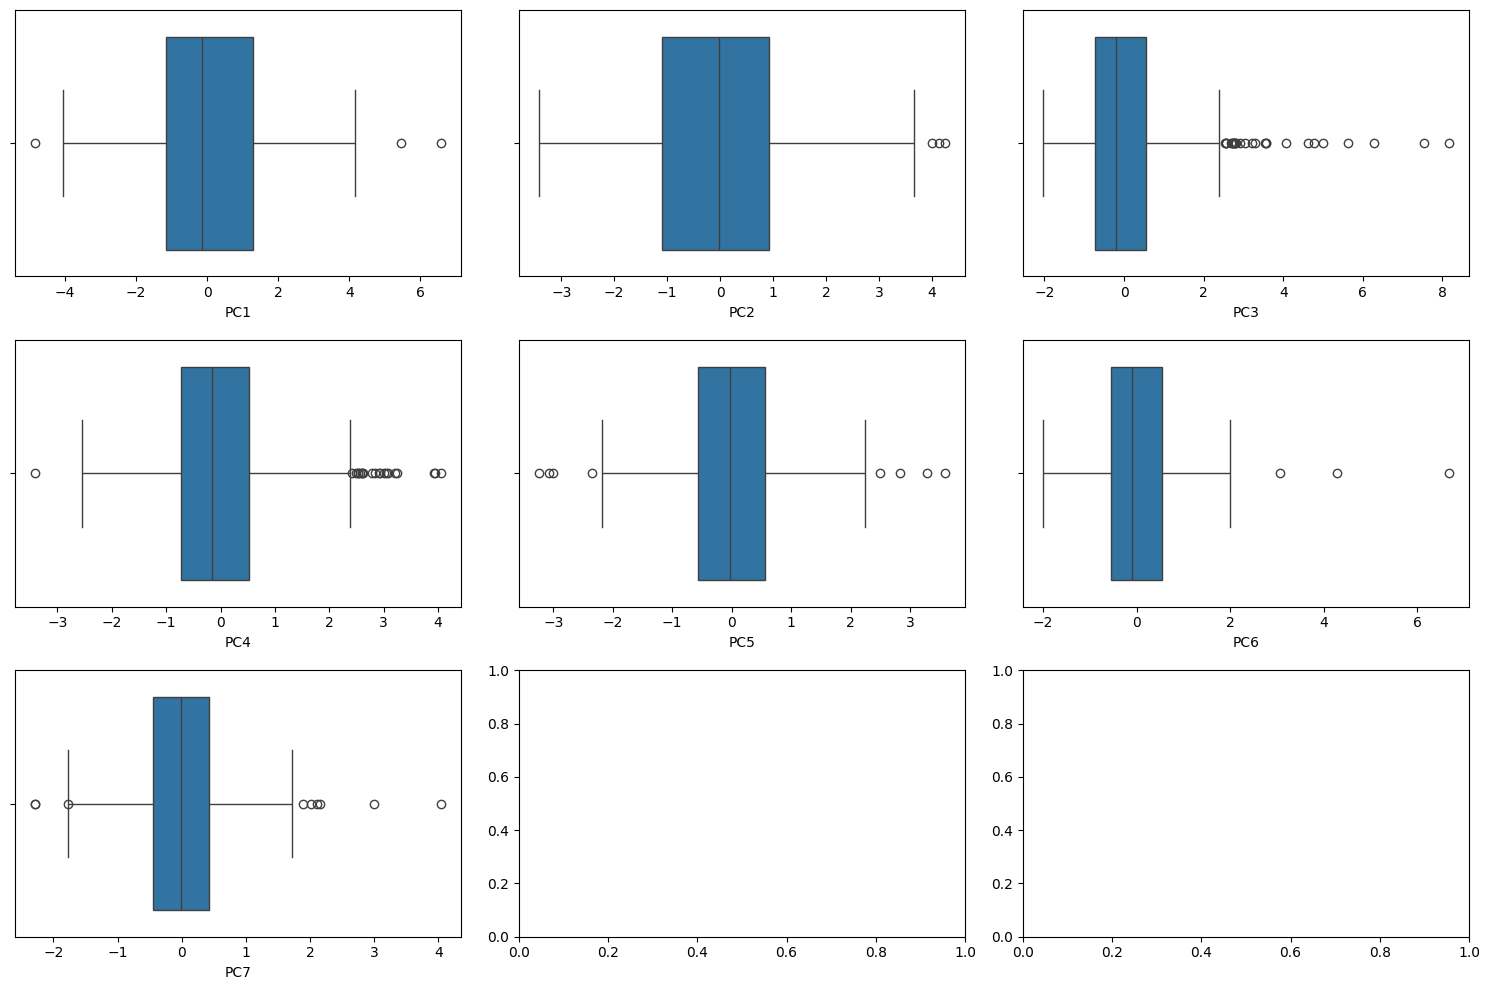

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col_name in enumerate(pca_df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=pca_df[col_name], ax=axes[row, col])  # Use col_name to access column by name

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

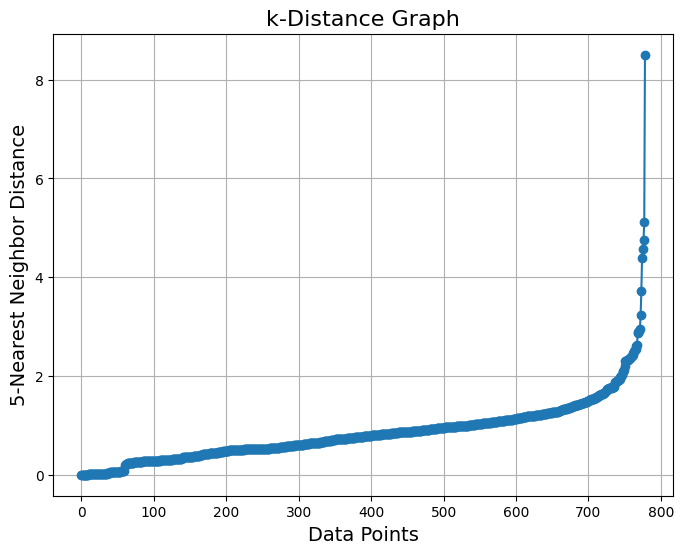

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Assuming you have your data stored in a numpy array 'X'
X = pca_df.copy(deep=True)  # Your data

# Fit a k-nearest neighbors model to compute distances
n_neighbors = 5  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
distances, _ = nbrs.kneighbors(X)

# Sort the distances of each point to its k-nearest neighbors
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(X)), k_distances, marker='o', linestyle='-')
plt.title('k-Distance Graph', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel(f'{n_neighbors}-Nearest Neighbor Distance', fontsize=14)
plt.grid(True)
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0

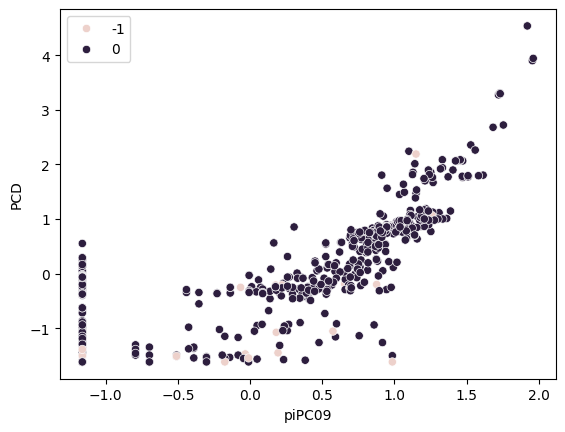

In [ ]:
# Initialize the DBSCAN model with desired parameters
dbscan = DBSCAN(eps=1.95, min_samples=14)

# Fit the model to the scaled data
labels_dbscan = dbscan.fit_predict(pca_df)

# Print the cluster labels
print(labels_dbscan)

# Display predicted labels with x as piPC09 and y as PCD with hue as DBSCAN predicetd label
sns.scatterplot(x="piPC09", y="PCD", hue=labels_dbscan, data=df_scaled)
plt.show()

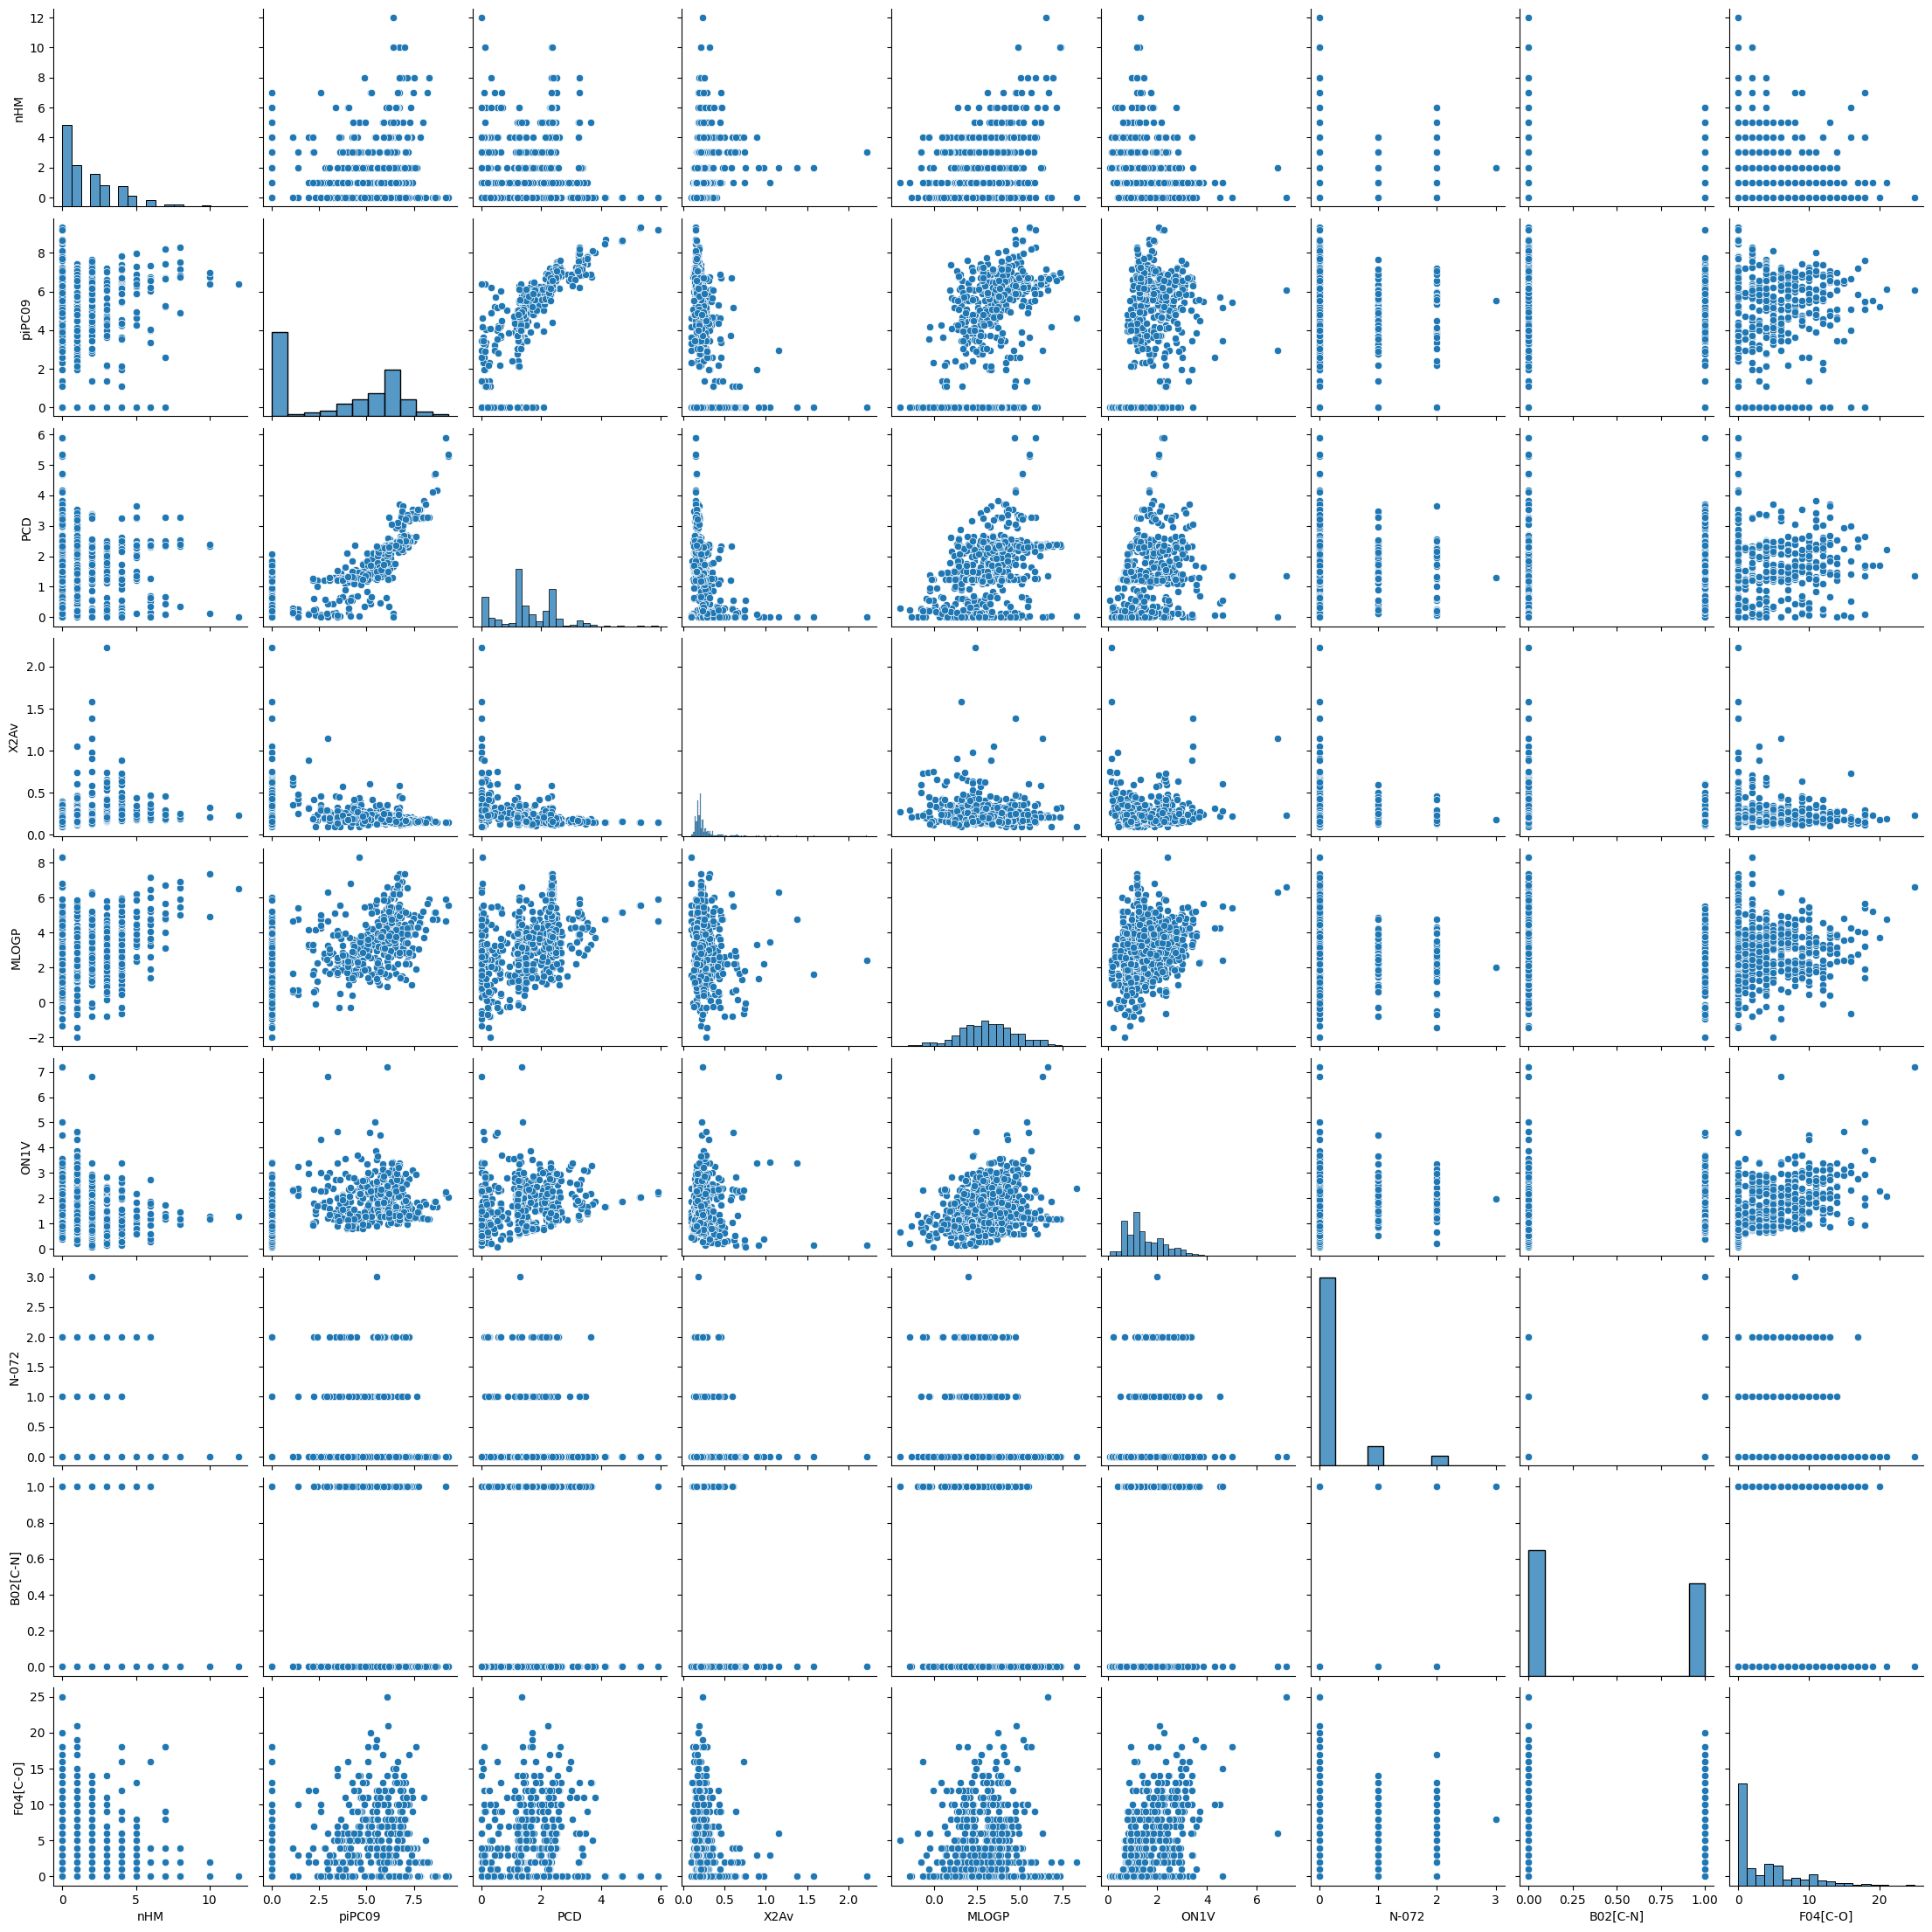

In [ ]:
sns.pairplot(df)
plt.show()


14(a). Apply SVD and display explained variance.
14(b). Display Cumulative variance.
14(c). Apply proper technique to find optimal n_components for svd
14(d). Decompose the dataset with by retaining 90% of information using PCA

In [ ]:

from sklearn.decomposition import TruncatedSVD

# Initialize the SVD model
svd = TruncatedSVD(n_components=7)

# Fit the model to the data
svd.fit(df_scaled)

# Get the explained variance ratios
explained_variance = svd.explained_variance_ratio_

# Print the explained variance
print("Explained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")


Explained Variance:
PC1: 0.2862
PC2: 0.2319
PC3: 0.1455
PC4: 0.1097
PC5: 0.0749
PC6: 0.0626
PC7: 0.0519


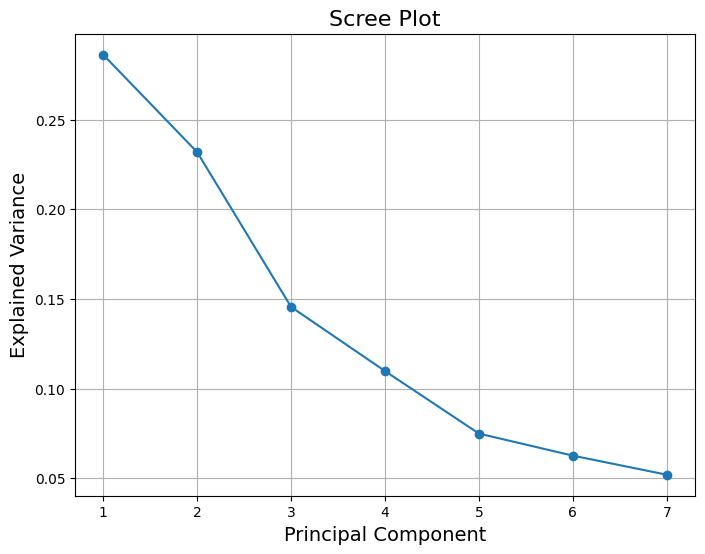

In [ ]:
# Find optimal number of components using scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:


# Assuming you have already scaled your data and stored it in df_scaled
# svd = TruncatedSVD(n_components=0.90)
# svd.fit(df_scaled)
# Initialize the SVD model
svd = TruncatedSVD(n_components=7)

transformed_data=svd.fit_transform(df_scaled)
# Transformed data

svd_df = pd.DataFrame(transformed_data, columns=[f"PC{i+1}" for i in range(transformed_data.shape[1])])

svd_df.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.016009,-1.487967,-1.442479,-0.457584,0.726557,0.405753,-0.122824
1,0.881730,-1.425552,-1.307014,-0.496336,0.648610,0.361328,-0.301334
2,0.768580,0.393879,0.200132,-1.114406,-1.063223,-0.693351,-0.695911
3,0.557953,-1.538621,-1.221316,-0.604389,1.128133,0.321561,-0.095357
4,1.766564,0.025886,-0.155269,-0.922593,-0.656319,-0.728863,-0.213843


In [ ]:
# Decompose the dataset with by retaining 95% of information
svd = T

# Transformed data
#transformed_data = pca.transform(df_scaled)

InvalidParameterError: The 'n_components' parameter of TruncatedSVD must be an int in the range [1, inf). Got 0.95 instead.

15(a). Cluster the decomposed svd data into optimal cluster with most suitable hard & soft clustering method
15(b). Write the inferenece for the above